In [184]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# Read excel file into dataframe
HouseHuntersDF = pd.read_excel("HouseHuntersData.xlsx")
print(len(HouseHuntersDF['Address']))
HouseHuntersDF.head()

716


,Address,Zip Code,Asking Price,Zestimate,Lot Size (in acres),Square Feet,Bedrooms,Bathrooms,Year Built,Home Type
0,"3085 Eastbrook Ter SW, Atlanta, GA",30331,349900.0,NaN,10018.0,3636.0,6,4.0,2008.0,SingleFamily
1,"5524 Stone Cove Dr SW, Atlanta, GA",30331,317000.0,312078.0,14374.0,5002.0,6,4.0,2007.0,SingleFamily
2,"45 Ivan Allen Jr Blvd NW UNIT 1901, Atlanta, GA",30308,545000.0,533631.0,1773.0,1774.0,2,3.0,2010.0,Condominium
3,"3300 Ferncliff Ln, Atlanta, GA",30324,527900.0,517626.0,871.0,1872.0,3,4.0,2012.0,Condominium
4,"229 Woodward Ave SE, Atlanta, GA",30312,487900.0,466183.0,2610.0,2040.0,4,3.0,2016.0,SingleFamily


In [186]:
# Get user prefernces
home_price = input("What is your ideal price? ")
home_lot_size = input("What is your ideal lot size? ")
home_footage = input("What is your ideal square footage? ")
home_beds = input("What is your ideal number of bedrooms? ")
home_baths = input("What is your ideal number of bathrooms? ")
home_year = input("What is your ideal build year? ")
home_type = input("What is your ideal home type? ")

# Convert these input values to integer type
home_price = float(home_price)
home_lot_size = float(home_lot_size)
home_beds = int(home_beds)
home_baths = int(home_baths)
home_year = int(home_year)
home_footage = int(home_footage)

weights = list(np.arange(1,6,1))
usedweights = []
user_weights = []
weightedvalues = ["Home Price","Lot Size","Square Feet","Number of bedrooms","Number of bathrooms"]

for item in weightedvalues:
    print(item)
    weight = int(input('Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least)'))
    user_weights.append((weight * 2 / 10) + 1)

What is your ideal price?  300000
What is your ideal lot size?  0.5
What is your ideal square footage?  2000
What is your ideal number of bedrooms?  3
What is your ideal number of bathrooms?  2
What is your ideal build year?  2000
What is your ideal home type?  SingleFamily


Home Price


Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least) 5


Lot Size


Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least) 1


Square Feet


Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least) 3


Number of bedrooms


Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least) 5


Number of bathrooms


Assign a number from 1-5, to indicate the importance of this category. (5 being most important, 1 being least) 3


In [187]:
#Create Data Frame for Price Input
length_initial = len(HouseHuntersDF['Address'])
HouseHuntersNADropDF = HouseHuntersDF.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
length_final = length_initial - len(HouseHuntersNADropDF['Address'])
print(f'Number of houses dropped for null data: {length_final}')

HouseHunters_Input_1 = HouseHuntersNADropDF[HouseHuntersNADropDF['Asking Price'].astype(int)<=home_price]

#Create Data Frame for Home Lot Size Input Using Previous Input Data Frame
HouseHunters_Input_1['Lot Size (in acres)'] = HouseHunters_Input_1['Lot Size (in acres)'].astype(float)*0.0000229568
HouseHunters_Input_2 = HouseHunters_Input_1.loc[HouseHunters_Input_1['Lot Size (in acres)']>=home_lot_size]

#Create Data Frame for Square Footage Input Using Previous Input Data Frame
HouseHunters_Input_3 = HouseHunters_Input_2.loc[HouseHunters_Input_2['Square Feet'].astype(int)>=home_footage]

#Create Data Frame for Bedrooms Input Using Previous Input Data Frame
HouseHunters_Input_4 = HouseHunters_Input_3.loc[HouseHunters_Input_3['Bedrooms'].astype(int)>=home_beds]

#Create Data Frame for Bathrooms Using Previous Input Data Frame
HouseHunters_Input_5 = HouseHunters_Input_4.loc[HouseHunters_Input_4['Bathrooms'].astype(float)>=home_baths]

#Create Data Frame for Home Year Input Using Previous Input Data Frame
HouseHunters_Input_6 = HouseHunters_Input_5.loc[HouseHunters_Input_5['Year Built'].astype(int)>=home_year]

#Create Data Frame for Home Type Input Using Previous Input Data Frame
HouseHunters_Input_7 = HouseHunters_Input_6.loc[HouseHunters_Input_6['Home Type'].astype(str)>=home_type]
HouseHunters_Input_7 = HouseHunters_Input_7.reset_index(drop=True)


Number of houses dropped for null data: 104


C:\Users\farad\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


                               Address  Zip Code  Asking Price  Zestimate  \
0       2500 Butner Rd SW, Atlanta, GA     30331       90000.0    88020.0   
1  3275 Landings North Dr, Atlanta, GA     30331      282500.0   278706.0   

   Lot Size (in acres)  Square Feet  Bedrooms  Bathrooms  Year Built  \
0             0.919994       3702.0         5        4.0      2010.0   
1             0.505394       3536.0         5        3.0      2007.0   

      Home Type  Scores  
0  SingleFamily    84.0  
1  SingleFamily    26.4  


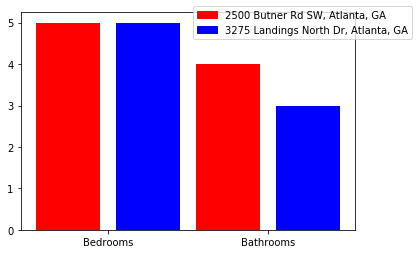

In [188]:
# Normalize the values within this dataframe
HouseHunters_Input_8 = HouseHunters_Input_7
scaledDF = pd.DataFrame()

columnlist = ['Lot Size (in acres)', 'Square Feet', 'Bedrooms', 'Bathrooms']
for column in columnlist:
    
    #Get Min and Max Values
    Max = float(HouseHunters_Input_7[column].max())
    Min = float(HouseHunters_Input_7[column].min())
    for i in range(len(HouseHunters_Input_7[column])):
        if float(HouseHunters_Input_7[column].iloc[i]) > Max:
            Max = float(HouseHunters_Input_7[column].iloc[i])
        elif float(HouseHunters_Input_7[column].iloc[i]) < Min:
            Min = float(HouseHunters_Input_7[column].iloc[i])
    
    #Scale all values to 1-10
    New_Values = []
    for i in range(len(HouseHunters_Input_7[column])):
        item = float(HouseHunters_Input_7[column].iloc[i])
        if item == Max:
            new_item = 10
        elif item == Min:
            new_item = 1
        else:
            new_item = 10 * (item - Min) / (Max - Min)
        New_Values.append(new_item)
    scaledDF[column] = New_Values

# 'Asking Price' scaling
column = 'Asking Price'
Max = float(HouseHunters_Input_7[column].max())
Min = float(HouseHunters_Input_7[column].min())
for i in range(len(HouseHunters_Input_7[column])):
    if float(HouseHunters_Input_7[column].iloc[i]) > Max:
        Max = float(HouseHunters_Input_7[column].iloc[i])
    elif float(HouseHunters_Input_7[column].iloc[i]) < Min:
        Min = float(HouseHunters_Input_7[column].iloc[i])

#Scale all values to 1-10
New_Values = []
for i in range(len(HouseHunters_Input_7[column])):
    item = float(HouseHunters_Input_7[column].iloc[i])
    if item == Max:
        new_item = 1
    elif item == Min:
        new_item = 10
    else:
        new_item = 10 * (Max - item) / (Max - Min)
    New_Values.append(new_item)
scaledDF[column] = New_Values

#Create a column scoring each home on its attributes
scores = []
for i in scaledDF.index:
    score = (scaledDF['Asking Price'].iloc[i] * user_weights[0]) + (scaledDF['Lot Size (in acres)'].iloc[i] * user_weights[1]) + (scaledDF['Square Feet'].iloc[i] * user_weights[2]) + (scaledDF['Bedrooms'].iloc[i] * user_weights[3]) + (scaledDF['Bathrooms'].iloc[i] * user_weights[4])
    scores.append(score)

HouseHunters_Input_8['Scores'] = pd.Series(scores)
HouseHunters_Input_9 = HouseHunters_Input_8.sort_values(by='Scores', ascending=False).reset_index(drop=True)

# Print final dataframe
if len(HouseHunters_Input_7['Address']) == 0:
    print('There were no homes founding matching your criteria.\nPlease broaden your search criteria or make mo money fool')
else:
    print(HouseHunters_Input_9)
    bedrooms_both_df = pd.DataFrame({'Address':HouseHunters_Input_9['Address'], 'Bedrooms':HouseHunters_Input_9['Bedrooms'],'Bathrooms':HouseHunters_Input_9['Bathrooms']})
    bedrooms_both_df

    x_axis = np.arange(0,len(bedrooms_both_df['Address']))
    ItemsToGraph = []
    for i in bedrooms_both_df.index:
        address = bedrooms_both_df['Address'].iloc[i]
        ItemsToGraph.append(f'{address} Bedrooms')
    for i in bedrooms_both_df.index:
        address = bedrooms_both_df['Address'].iloc[i]
        ItemsToGraph.append(f'{address} Bathrooms')

    ValuesToGraph = []
    colors = []
    for i in bedrooms_both_df.index:
        ValuesToGraph.append(bedrooms_both_df['Bedrooms'].iloc[i])
    for i in bedrooms_both_df.index:
        ValuesToGraph.append(bedrooms_both_df['Bathrooms'].iloc[i])

    for i in bedrooms_both_df.index:
        colors.append('r')
        colors.append('b')

    ValuesToGraph
    ItemsToGraph
    ValuesToGraph

    plt.bar(ItemsToGraph, ValuesToGraph, color=colors)
    tick_locations = [0.5,2.5]
    plt.xticks(tick_locations, ['Bedrooms','Bathrooms'])
    patches = []
    for i in bedrooms_both_df.index:
        patch = mpatches.Patch(color=colors[i], label=bedrooms_both_df['Address'].iloc[i])
        patches.append(patch)
    plt.legend(handles=patches, bbox_to_anchor=(0.5, 1.05))
    plt.savefig("Bedroom_Bathroom_Breakdown.png")
    plt.show()

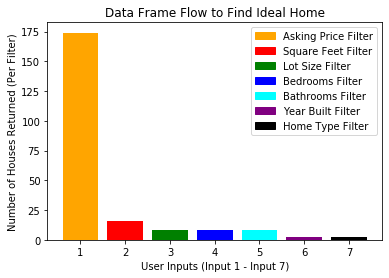

In [189]:
inputL = []

Asking_Price = len(HouseHunters_Input_1)
inputL.append(Asking_Price)
                   
Lot_Size = len(HouseHunters_Input_2)
inputL.append(Lot_Size)
               
Square_Feet = len(HouseHunters_Input_3)
inputL.append(Square_Feet)
                  
Bedrooms = len(HouseHunters_Input_4)
inputL.append(Bedrooms)
               
Bathrooms = len(HouseHunters_Input_5)
inputL.append(Bathrooms)

Year_Built = len(HouseHunters_Input_6)
inputL.append(Year_Built)

Home_Type = len(HouseHunters_Input_9)
inputL.append(Home_Type)

plt.bar(x=np.arange(1,8,1), height=inputL, color=['orange', 'red', 'green', 'blue', 'cyan', 'purple', 'black'])

orange_patch = mpatches.Patch(color='orange', label='Asking Price Filter')
red_patch = mpatches.Patch(color='red', label='Square Feet Filter')
green_patch = mpatches.Patch(color='green', label='Lot Size Filter')
blue_patch = mpatches.Patch(color='blue', label='Bedrooms Filter')
cyan_patch = mpatches.Patch(color='cyan', label='Bathrooms Filter')
purple_patch = mpatches.Patch(color='purple', label='Year Built Filter')
black_patch = mpatches.Patch(color='black', label='Home Type Filter')
plt.legend(handles=[orange_patch,
                    red_patch,
                    green_patch,
                    blue_patch,
                    cyan_patch,
                    purple_patch,
                    black_patch])

plt.ylabel('Number of Houses Returned (Per Filter)')
plt.xlabel('User Inputs (Input 1 - Input 7)')
plt.title('Data Frame Flow to Find Ideal Home')

plt.savefig("Data Frame Flow to Find Ideal Home.png")
plt.show()

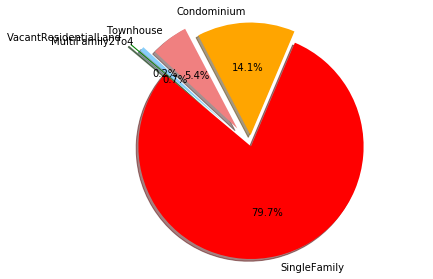

In [190]:
# Get counts for home type
Count_SingleFamily = HouseHuntersNADropDF['Home Type'].loc[HouseHuntersNADropDF['Home Type']=='SingleFamily'].count()
Count_Condominium = HouseHuntersNADropDF['Home Type'].loc[HouseHuntersNADropDF['Home Type']=='Condominium'].count()
Count_Townhouse = HouseHuntersNADropDF['Home Type'].loc[HouseHuntersNADropDF['Home Type']=='Townhouse'].count()
Count_MultiFamily2To4 = HouseHuntersNADropDF['Home Type'].loc[HouseHuntersNADropDF['Home Type']=='MultiFamily2To4'].count()
Count_VacantResidentialLand = HouseHuntersNADropDF['Home Type'].loc[HouseHuntersNADropDF['Home Type']=='VacantResidentialLand'].count()

# Labels for the sections of our pie chart
labels = ["SingleFamily", "Condominium", "Townhouse", "MultiFamily2To4","VacantResidentialLand"]

# The values of each section of the pie chart
sizes = [Count_SingleFamily, Count_Condominium, Count_Townhouse, Count_MultiFamily2To4, Count_VacantResidentialLand]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0.2, 0.3, .4)

fig1, ax1 = plt.subplots()
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

ax1.axis('equal')
plt.tight_layout()
plt.savefig("Percent Breakdown By Home Type.png")
plt.show()